In [7]:
!pip install numpy matplotlib moviepy scipy

  Using cached moviepy-1.0.3.tar.gz (388 kB)
  Preparing metadata (setup.py): started
  Preparing metadata (setup.py): finished with status 'done'
  Obtaining dependency information for decorator<5.0,>=4.0.2 from https://files.pythonhosted.org/packages/ed/1b/72a1821152d07cf1d8b6fce298aeb06a7eb90f4d6d41acec9861e7cc6df0/decorator-4.4.2-py2.py3-none-any.whl.metadata
  Using cached decorator-4.4.2-py2.py3-none-any.whl.metadata (4.2 kB)
  Obtaining dependency information for proglog<=1.0.0 from https://files.pythonhosted.org/packages/8b/f5/cab5cf6a540c31f5099043de0ae43990fd9cf66f75ecb5e9f254a4e4d4ee/proglog-0.1.10-py3-none-any.whl.metadata
  Using cached proglog-0.1.10-py3-none-any.whl.metadata (639 bytes)
  Obtaining dependency information for imageio_ffmpeg>=0.2.0 from https://files.pythonhosted.org/packages/c6/01/716106099e48c4f419876d5814679a94dd7d6f441217c97c1b608123c6bb/imageio_ffmpeg-0.4.9-py3-none-win_amd64.whl.metadata
  Using cached imageio_ffmpeg-0.4.9-py3-none-win_amd64.whl.meta

MovieWriter ffmpeg unavailable; using Pillow instead.


ValueError: unknown file extension: .mp4

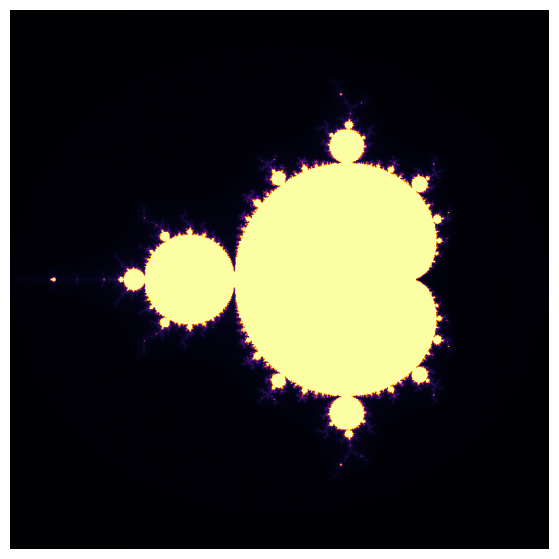

In [10]:
import numpy as np
import matplotlib.pyplot as plt
from matplotlib.animation import FuncAnimation
from moviepy.editor import VideoFileClip, AudioFileClip
from scipy.io.wavfile import write
import os

# Параметры для множества Мандельброта
x_min, x_max = -2.0, 1.0
y_min, y_max = -1.5, 1.5
width, height = 800, 600
max_iter = 256

# Создание множества Мандельброта
def mandelbrot(c, max_iter):
    z = c
    for n in range(max_iter):
        if abs(z) > 2:
            return n
        z = z*z + c
    return max_iter

def mandelbrot_set(xmin, xmax, ymin, ymax, width, height, max_iter):
    r1 = np.linspace(xmin, xmax, width)
    r2 = np.linspace(ymin, ymax, height)
    n3 = np.empty((width, height))
    for i in range(width):
        for j in range(height):
            n3[i, j] = mandelbrot(r1[i] + 1j*r2[j], max_iter)
    return (r1, r2, n3)

def plot_mandelbrot(xmin, xmax, ymin, ymax, width, height, max_iter, ax):
    X, Y, Z = mandelbrot_set(xmin, xmax, ymin, ymax, width, height, max_iter)
    ax.imshow(Z.T, extent=[xmin, xmax, ymin, ymax], interpolation="bilinear", cmap="inferno")
    ax.axis("off")

# Анимация множества Мандельброта
fig, ax = plt.subplots(figsize=(10, 7))
ax.set_xticks([])
ax.set_yticks([])

def update(frame):
    ax.clear()
    zoom = 2**(frame/30)
    plot_mandelbrot(-2.0/zoom, 1.0/zoom, -1.5/zoom, 1.5/zoom, width, height, max_iter, ax)
    return ax,

anim = FuncAnimation(fig, update, frames=60, interval=100)
video_path = "mandelbrot_zoom.mp4"
anim.save(video_path, writer="ffmpeg", dpi=200)

# Создание звуковой дорожки
duration = 2.0  # секунды
freq = 440.0    # частота, Гц
sample_rate = 44100  # частота дискретизации

t = np.linspace(0., duration, int(sample_rate * duration))
audio = 0.5 * np.sin(2. * np.pi * freq * t)
audio_path = "music.wav"
write(audio_path, sample_rate, audio.astype(np.float32))

# Объединение видео и аудио
final_video_path = "mandelbrot_final.mp4"
video_clip = VideoFileClip(video_path)
audio_clip = AudioFileClip(audio_path).set_duration(video_clip.duration)
final_clip = video_clip.set_audio(audio_clip)
final_clip.write_videofile(final_video_path, fps=30)

# # Удаление временных файлов
# os.remove(video_path)
# os.remove(audio_path)